In [701]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import MaxNLocator
import matplotlib.dates as dates
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler ,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [702]:
df = pd.read_csv("NIFTY 50_Historical_PR_02071990to14072024.csv")
df

,Index Name,Date,Open,High,Low,Close
0,NIFTY 50,12 Jul 2024,24387.95,24592.2,24331.15,24502.15
1,NIFTY 50,11 Jul 2024,24396.55,24402.65,24193.75,24315.95
2,NIFTY 50,10 Jul 2024,24459.85,24461.05,24141.8,24324.45
3,NIFTY 50,09 Jul 2024,24351,24443.6,24331.9,24433.20
4,NIFTY 50,08 Jul 2024,24329.45,24344.6,24240.55,24320.55
...,...,...,...,...,...,...
8258,NIFTY 50,10 Jul 1990,-,-,-,288.69
8259,NIFTY 50,09 Jul 1990,-,-,-,289.69
8260,NIFTY 50,06 Jul 1990,-,-,-,289.04
8261,NIFTY 50,05 Jul 1990,-,-,-,284.04


In [703]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8263 entries, 0 to 8262
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Index Name  8263 non-null   object 
 1   Date        8263 non-null   object 
 2   Open        8263 non-null   object 
 3   High        8263 non-null   object 
 4   Low         8263 non-null   object 
 5   Close       8263 non-null   float64
dtypes: float64(1), object(5)
memory usage: 387.5+ KB


In [704]:
df = df[::-1]
df = df[2500:]
df

,Index Name,Date,Open,High,Low,Close
5762,NIFTY 50,10 May 2001,1149.10,1151.60,1139.25,1144.95
5761,NIFTY 50,11 May 2001,1144.10,1146.85,1136.90,1140.50
5760,NIFTY 50,14 May 2001,1140.45,1146.25,1134.05,1140.80
5759,NIFTY 50,15 May 2001,1140.75,1147.75,1096.25,1145.30
5758,NIFTY 50,16 May 2001,1147.10,1163.15,1146.05,1151.15
...,...,...,...,...,...,...
4,NIFTY 50,08 Jul 2024,24329.45,24344.6,24240.55,24320.55
3,NIFTY 50,09 Jul 2024,24351,24443.6,24331.9,24433.20
2,NIFTY 50,10 Jul 2024,24459.85,24461.05,24141.8,24324.45
1,NIFTY 50,11 Jul 2024,24396.55,24402.65,24193.75,24315.95


In [705]:
df =df.reset_index()

In [706]:
df

,index,Index Name,Date,Open,High,Low,Close
0,5762,NIFTY 50,10 May 2001,1149.10,1151.60,1139.25,1144.95
1,5761,NIFTY 50,11 May 2001,1144.10,1146.85,1136.90,1140.50
2,5760,NIFTY 50,14 May 2001,1140.45,1146.25,1134.05,1140.80
3,5759,NIFTY 50,15 May 2001,1140.75,1147.75,1096.25,1145.30
4,5758,NIFTY 50,16 May 2001,1147.10,1163.15,1146.05,1151.15
...,...,...,...,...,...,...,...
5758,4,NIFTY 50,08 Jul 2024,24329.45,24344.6,24240.55,24320.55
5759,3,NIFTY 50,09 Jul 2024,24351,24443.6,24331.9,24433.20
5760,2,NIFTY 50,10 Jul 2024,24459.85,24461.05,24141.8,24324.45
5761,1,NIFTY 50,11 Jul 2024,24396.55,24402.65,24193.75,24315.95


In [707]:
df = df.set_index('Date')
col = ['index','Index Name']
df = df.drop(col,axis=1)
df, df.shape

(                 Open      High       Low     Close
 Date                                               
 10 May 2001   1149.10   1151.60   1139.25   1144.95
 11 May 2001   1144.10   1146.85   1136.90   1140.50
 14 May 2001   1140.45   1146.25   1134.05   1140.80
 15 May 2001   1140.75   1147.75   1096.25   1145.30
 16 May 2001   1147.10   1163.15   1146.05   1151.15
 ...               ...       ...       ...       ...
 08 Jul 2024  24329.45   24344.6  24240.55  24320.55
 09 Jul 2024     24351   24443.6   24331.9  24433.20
 10 Jul 2024  24459.85  24461.05   24141.8  24324.45
 11 Jul 2024  24396.55  24402.65  24193.75  24315.95
 12 Jul 2024  24387.95   24592.2  24331.15  24502.15
 
 [5763 rows x 4 columns],
 (5763, 4))

In [708]:
df.isnull().sum()

Open     0
High     0
Low      0
Close    0
dtype: int64

In [709]:
print(df.dtypes)

Open      object
High      object
Low       object
Close    float64
dtype: object


In [710]:
df['Open'] = pd.to_numeric(df['Open'])
df['High'] = pd.to_numeric(df['High'])
df['Low'] = pd.to_numeric(df['Low'])


In [711]:
df,df.shape

(                 Open      High       Low     Close
 Date                                               
 10 May 2001   1149.10   1151.60   1139.25   1144.95
 11 May 2001   1144.10   1146.85   1136.90   1140.50
 14 May 2001   1140.45   1146.25   1134.05   1140.80
 15 May 2001   1140.75   1147.75   1096.25   1145.30
 16 May 2001   1147.10   1163.15   1146.05   1151.15
 ...               ...       ...       ...       ...
 08 Jul 2024  24329.45  24344.60  24240.55  24320.55
 09 Jul 2024  24351.00  24443.60  24331.90  24433.20
 10 Jul 2024  24459.85  24461.05  24141.80  24324.45
 11 Jul 2024  24396.55  24402.65  24193.75  24315.95
 12 Jul 2024  24387.95  24592.20  24331.15  24502.15
 
 [5763 rows x 4 columns],
 (5763, 4))

In [712]:
df.dtypes

Open     float64
High     float64
Low      float64
Close    float64
dtype: object

<Axes: >

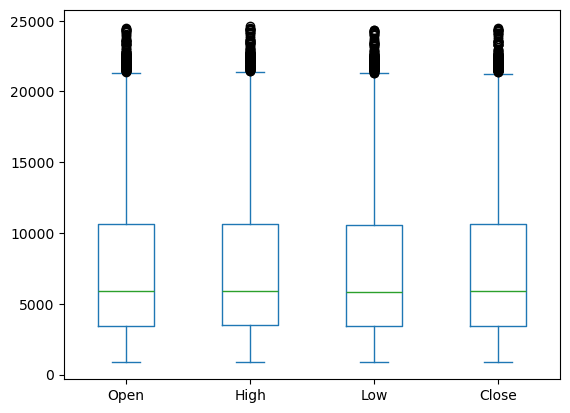

In [713]:
df[['Open','High','Low','Close']].plot(kind='box')

In [714]:
x = df[['Open','High','Low']]
y = df[['Close']]
x,y,x.shape,y.shape

(                 Open      High       Low
 Date                                     
 10 May 2001   1149.10   1151.60   1139.25
 11 May 2001   1144.10   1146.85   1136.90
 14 May 2001   1140.45   1146.25   1134.05
 15 May 2001   1140.75   1147.75   1096.25
 16 May 2001   1147.10   1163.15   1146.05
 ...               ...       ...       ...
 08 Jul 2024  24329.45  24344.60  24240.55
 09 Jul 2024  24351.00  24443.60  24331.90
 10 Jul 2024  24459.85  24461.05  24141.80
 11 Jul 2024  24396.55  24402.65  24193.75
 12 Jul 2024  24387.95  24592.20  24331.15
 
 [5763 rows x 3 columns],
                 Close
 Date                 
 10 May 2001   1144.95
 11 May 2001   1140.50
 14 May 2001   1140.80
 15 May 2001   1145.30
 16 May 2001   1151.15
 ...               ...
 08 Jul 2024  24320.55
 09 Jul 2024  24433.20
 10 Jul 2024  24324.45
 11 Jul 2024  24315.95
 12 Jul 2024  24502.15
 
 [5763 rows x 1 columns],
 (5763, 3),
 (5763, 1))

In [715]:
y

,Close
Date,
10 May 2001,1144.95
11 May 2001,1140.50
14 May 2001,1140.80
15 May 2001,1145.30
16 May 2001,1151.15
...,...
08 Jul 2024,24320.55
09 Jul 2024,24433.20
10 Jul 2024,24324.45


total_days = int(len(df))
train_index = int(total_days * 0.7) # 70% Training Data 30% Testing Data
test_index = train_index
print(train_index)

In [717]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
print(x)

[[0.01254297 0.01157907 0.0123201 ]
 [0.01233117 0.01137878 0.01222002]
 [0.01217655 0.01135348 0.01209865]
 ...
 [1.         0.99446979 0.99190442]
 [0.99731857 0.99200724 0.99411676]
 [0.99695427 1.         0.99996806]]


In [765]:
total_days = int(len(df))
train_index = int(total_days * 0.8)
test_index = train_index

In [767]:
X_train = x[:train_index]
Y_train = y[:train_index]
X_test = x[test_index:]
Y_test = y[test_index:]

In [769]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(4610, 3) (1153, 3) (4610, 1) (1153, 1)


In [771]:
print(Y_train)

                Close
Date                 
10 May 2001   1144.95
11 May 2001   1140.50
14 May 2001   1140.80
15 May 2001   1145.30
16 May 2001   1151.15
...               ...
18 Nov 2019  11884.50
19 Nov 2019  11940.10
20 Nov 2019  11999.10
21 Nov 2019  11968.40
22 Nov 2019  11914.40

[4610 rows x 1 columns]


In [773]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [775]:
model.score(X_train,Y_train)

0.9999350059596079

In [723]:
predict = model.predict(X_test)
print(predict)

[[ 9873.03705375]
 [ 9957.50630002]
 [ 9962.97367199]
 ...
 [24234.94952925]
 [24253.37912283]
 [24514.40803349]]


In [724]:
model.score(X_test,Y_test)

0.9998720862115374

In [725]:
mse = mean_squared_error(predict,Y_test)
print("Mean Squared Error ",mse)

Mean Squared Error  2064.0691237342635


In [726]:
mae = mean_absolute_error(predict,Y_test)
print("Mean Absolute Error",mae)

Mean Absolute Error 33.11402703269475


In [727]:
rmse = sqrt(mae)
print("Root Mean Squared Error",rmse)

Root Mean Squared Error 5.754478867169012


In [728]:
Y_test = Y_test.sort_values('Date')

In [729]:
Y_test

,Close
Date,
01 Apr 2019,11669.15
01 Apr 2020,8253.80
01 Apr 2021,14867.35
01 Apr 2022,17670.45
01 Apr 2024,22462.00
...,...
31 Oct 2017,10335.30
31 Oct 2018,10386.60
31 Oct 2019,11877.45


In [730]:
final = pd.DataFrame()
final['Date'] = Y_test.index
final = final.set_index('Date')
final['Close'] = Y_test['Close']
final['Pred'] = predict
final = final.sort_values('Date')

In [731]:
final = final.sort_values('Date')
final

,Close,Pred
Date,,
01 Apr 2019,11669.15,9873.037054
01 Apr 2020,8253.80,9957.506300
01 Apr 2021,14867.35,9962.973672
01 Apr 2022,17670.45,10001.450126
01 Apr 2024,22462.00,10062.150242
...,...,...
31 Oct 2017,10335.30,24270.694349
31 Oct 2018,10386.60,24406.182937
31 Oct 2019,11877.45,24234.949529


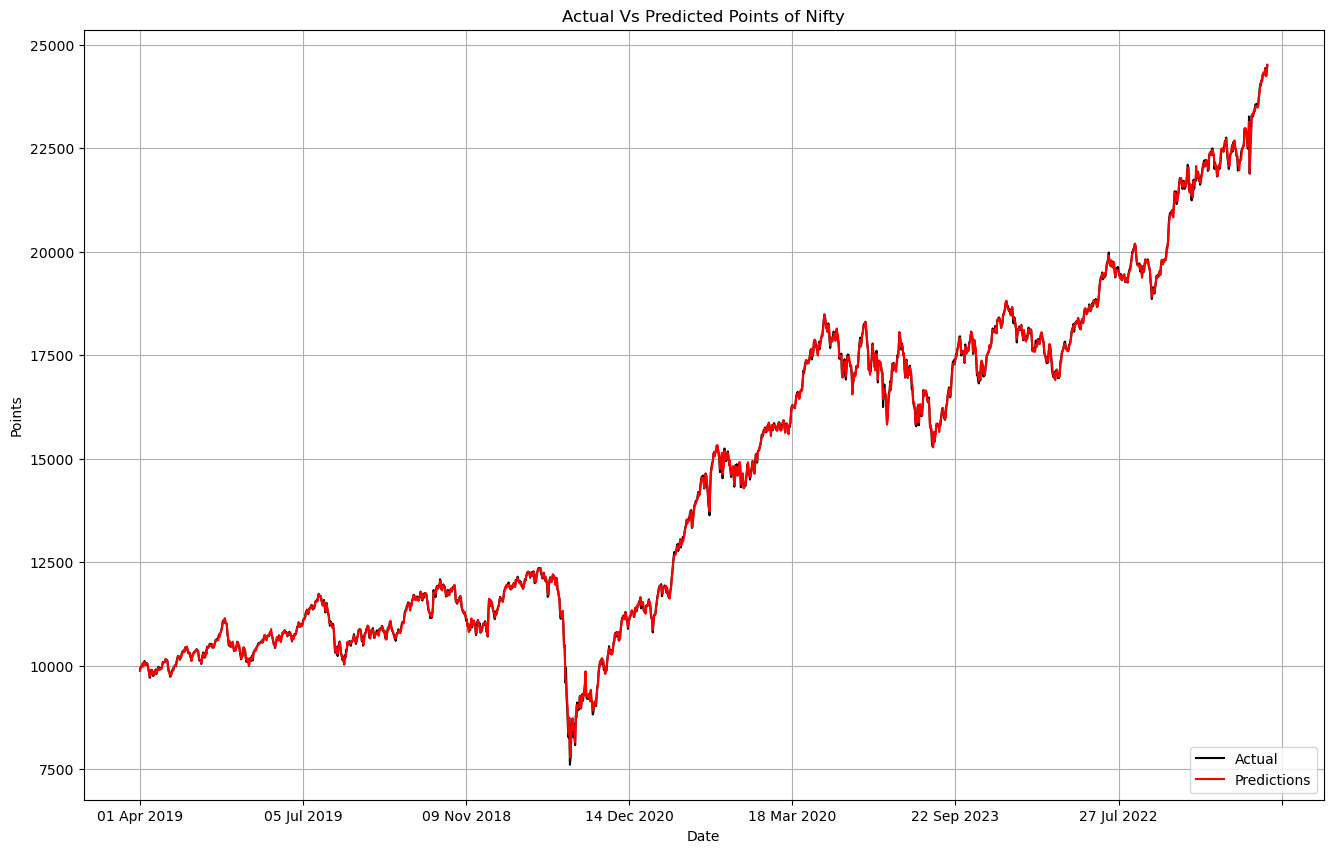

In [732]:
df['Close'][test_index:].plot(figsize=(16,10),color='black')
final['Pred'].plot(figsize=(16,10),color='red')
plt.ylabel('Points')
plt.title('Actual Vs Predicted Points of Nifty')
plt.grid()
plt.legend(['Actual', 'Predictions'], loc = 'lower right')
